In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [3]:
np.random.seed(123)

In [4]:
df = pd.read_csv('/kaggle/input/well-predictor/CGWB.csv')
df

,Well ID,S.No,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,Year,pH,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,W113126092431802,1,A&N Islands,South Andaman,PORT BLAIR,Kodiaghat,11.54500,92.74583,2021,7.74,...,NaN,175.0,34.0,22.0,10.0,0.0,0.84,NaN,206.0,4.8
1,W113616092411001,2,A&N Islands,South Andaman,PORT BLAIR,Sippighat,11.60250,92.73000,2021,7.53,...,NaN,250.0,52.0,29.0,51.0,1.0,0.28,NaN,381.0,6.4
2,W113640092443301,3,A&N Islands,South Andaman,PORT BLAIR,Brichganj,11.62083,92.73028,2021,7.50,...,NaN,125.0,4.0,28.0,10.0,1.0,0.46,NaN,151.0,BDL
3,W114421092422801,4,A&N Islands,South Andaman,FERRARGUNJ,Wimberleyganj,11.73250,92.70861,2021,7.60,...,NaN,135.0,26.0,17.0,15.0,2.0,0.37,NaN,198.0,0.4
4,W113955092391801,5,A&N Islands,South Andaman,FERRARGUNJ,Ograbraj,11.66361,92.65806,2021,7.82,...,NaN,465.0,56.0,79.0,336.0,18.0,0.95,NaN,1424.0,BDL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,NaN,9055,West Bengal,South 24 Parganas,Sagar,Digambari (rudranagar),21.70080,88.11250,2021,8.53,...,NaN,235.0,26.0,41.0,122.0,4.2,0,NaN,521.0,9.28
9055,NaN,9056,West Bengal,South 24 Parganas,Sagar,Ganga Sagar,22.55580,88.59690,2021,8.48,...,NaN,175.0,24.0,28.0,120.0,3.8,0,NaN,460.0,0.49
9056,NaN,9057,West Bengal,South 24 Parganas,Sagar,Kochuberia rc jetty ghat,21.85440,88.29780,2021,8.48,...,NaN,170.0,14.0,33.0,135.0,4.6,0,NaN,496.0,0.02
9057,NaN,9058,West Bengal,South 24 Parganas,Sonarpur,Langalberia,22.38560,88.40500,2021,8.71,...,NaN,285.0,56.0,35.0,32.0,5.2,0.12,NaN,378.0,0.20


In [5]:
df.columns

Index(['Well ID', 'S.No', 'STATE', 'DISTRICT', 'BLOCK', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'PO4', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'SiO2', 'TDS', 'U(ppb)'],
      dtype='object')

# **Pre-processing**

In [6]:
df.isnull().sum()

Well ID      3270
S.No            0
STATE           0
DISTRICT        0
BLOCK         194
LOCATION        1
LATITUDE       14
LONGITUDE      14
Year            0
pH              0
EC              0
CO3             0
HCO3            0
Cl              0
SO4             2
NO3             0
PO4          3150
TH              0
Ca              1
Mg              0
Na              0
K               1
F               0
SiO2         4135
TDS          4524
U(ppb)       6120
dtype: int64

In [7]:
df = df.drop(['Well ID','S.No','Year'],axis = 1)

unique_categories = df['BLOCK'].unique()
mapping_dict = {category: index + 1 for index, category in enumerate(unique_categories)}
# Map the values in the 'Category' column to numbers using the dynamic mapping dictionary
df['BLOCK'] = df['BLOCK'].map(mapping_dict)


unique_categories = df['LOCATION'].unique()
mapping_dict = {category: index + 1 for index, category in enumerate(unique_categories)}
# Map the values in the 'Category' column to numbers using the dynamic mapping dictionary
df['LOCATION'] = df['LOCATION'].map(mapping_dict)


unique_categories = df['DISTRICT'].unique()
mapping_dict = {category: index + 1 for index, category in enumerate(unique_categories)}
# Map the values in the 'Category' column to numbers using the dynamic mapping dictionary
df['DISTRICT'] = df['DISTRICT'].map(mapping_dict)


unique_categories = df['STATE'].unique()
mapping_dict = {category: index + 1 for index, category in enumerate(unique_categories)}
# Map the values in the 'Category' column to numbers using the dynamic mapping dictionary
df['STATE'] = df['STATE'].map(mapping_dict)

In [8]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')
df['SO4'] = pd.to_numeric(df['SO4'], errors='coerce')
df['PO4'] = pd.to_numeric(df['PO4'], errors='coerce')
df['Ca'] = pd.to_numeric(df['Ca'], errors='coerce')
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['SiO2'] = pd.to_numeric(df['SiO2'], errors='coerce')
df['TDS'] = pd.to_numeric(df['TDS'], errors='coerce')
df['U(ppb)'] = pd.to_numeric(df['U(ppb)'], errors='coerce')
df['BLOCK'] = pd.to_numeric(df['BLOCK'], errors='coerce')

df['BLOCK'].fillna(df['BLOCK'].mean(), inplace=True)
df['SO4'].fillna(df['SO4'].mean(), inplace=True)
df['PO4'].fillna(df['PO4'].mean(), inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True)
df['Ca'].fillna(df['Ca'].mean(), inplace=True)
df['K'].fillna(df['K'].mean(), inplace=True)
df['SiO2'].fillna(df['SiO2'].mean(), inplace=True)
df['TDS'].fillna(df['TDS'].mean(), inplace=True)
df['U(ppb)'].fillna(df['U(ppb)'].mean(), inplace=True)

In [9]:
df.isnull().sum()

STATE        0
DISTRICT     0
BLOCK        0
LOCATION     0
LATITUDE     0
LONGITUDE    0
pH           0
EC           0
CO3          0
HCO3         0
Cl           0
SO4          0
NO3          0
PO4          0
TH           0
Ca           0
Mg           0
Na           0
K            0
F            0
SiO2         0
TDS          0
U(ppb)       0
dtype: int64

In [10]:
df.dtypes

STATE          int64
DISTRICT       int64
BLOCK          int64
LOCATION       int64
LATITUDE     float64
LONGITUDE    float64
pH            object
EC           float64
CO3           object
HCO3         float64
Cl           float64
SO4          float64
NO3           object
PO4          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F             object
SiO2         float64
TDS          float64
U(ppb)       float64
dtype: object

In [11]:
df['pH'] = df['pH'].replace(['leaked'], 0)
df['pH'] = pd.to_numeric(df['pH'])


df['CO3'] = pd.to_numeric(df['CO3'], errors='coerce')  # Convert to numeric, coerce errors to NaN
mean_value = df['CO3'].mean()
# Replace 'Nil' with the calculated mean
df['CO3'].replace('Nil', mean_value, inplace=True)
df['CO3'] = pd.to_numeric(df['CO3'])


df['NO3'] = pd.to_numeric(df['NO3'], errors='coerce')  # Convert to numeric, coerce errors to NaN
mean_value = df['NO3'].mean()
df['NO3'].replace('nil', mean_value, inplace=True)
df['NO3'] = pd.to_numeric(df['NO3'])


df['F'] = pd.to_numeric(df['F'], errors='coerce')  # Convert to numeric, coerce errors to NaN
mean_value = df['F'].mean()
df['F'].replace('nil', mean_value, inplace=True)
df['F'] = pd.to_numeric(df['F'])

In [12]:
df.dtypes

STATE          int64
DISTRICT       int64
BLOCK          int64
LOCATION       int64
LATITUDE     float64
LONGITUDE    float64
pH           float64
EC           float64
CO3          float64
HCO3         float64
Cl           float64
SO4          float64
NO3          float64
PO4          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F            float64
SiO2         float64
TDS          float64
U(ppb)       float64
dtype: object

In [13]:
df = df.dropna(subset=df.columns[df.isna().any()])
df = df.astype(float)

In [14]:
df.dtypes

STATE        float64
DISTRICT     float64
BLOCK        float64
LOCATION     float64
LATITUDE     float64
LONGITUDE    float64
pH           float64
EC           float64
CO3          float64
HCO3         float64
Cl           float64
SO4          float64
NO3          float64
PO4          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F            float64
SiO2         float64
TDS          float64
U(ppb)       float64
dtype: object

In [15]:
df

,STATE,DISTRICT,BLOCK,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,...,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS,U(ppb)
0,1.0,1.0,1.0,1.0,11.54500,92.74583,7.74,349.0,0.0,183.0,...,0.067829,175.0,34.0,22.0,10.0,0.0,0.84,25.12151,206.0,4.800
1,1.0,1.0,1.0,2.0,11.60250,92.73000,7.53,660.0,0.0,262.0,...,0.067829,250.0,52.0,29.0,51.0,1.0,0.28,25.12151,381.0,6.400
2,1.0,1.0,1.0,3.0,11.62083,92.73028,7.50,270.0,0.0,116.0,...,0.067829,125.0,4.0,28.0,10.0,1.0,0.46,25.12151,151.0,2.387
3,1.0,1.0,2.0,4.0,11.73250,92.70861,7.60,311.0,0.0,159.0,...,0.067829,135.0,26.0,17.0,15.0,2.0,0.37,25.12151,198.0,0.400
4,1.0,1.0,2.0,5.0,11.66361,92.65806,7.82,2501.0,0.0,512.0,...,0.067829,465.0,56.0,79.0,336.0,18.0,0.95,25.12151,1424.0,2.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,26.0,403.0,1135.0,8095.0,21.70080,88.11250,8.53,827.0,27.0,256.0,...,0.067829,235.0,26.0,41.0,122.0,4.2,0.00,25.12151,521.0,9.280
9055,26.0,403.0,1135.0,8096.0,22.55580,88.59690,8.48,755.0,30.0,275.0,...,0.067829,175.0,24.0,28.0,120.0,3.8,0.00,25.12151,460.0,0.490
9056,26.0,403.0,1135.0,8097.0,21.85440,88.29780,8.48,856.0,30.0,262.0,...,0.067829,170.0,14.0,33.0,135.0,4.6,0.00,25.12151,496.0,0.020
9057,26.0,403.0,2049.0,8098.0,22.38560,88.40500,8.71,717.0,30.0,275.0,...,0.067829,285.0,56.0,35.0,32.0,5.2,0.12,25.12151,378.0,0.200


# **Visulization**

{'whiskers': [<matplotlib.lines.Line2D at 0x7aee4dbde260>,
 'caps': [<matplotlib.lines.Line2D at 0x7aee4dbdfc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aee4dbdf610>,
 'medians': [<matplotlib.lines.Line2D at 0x7aee4dbddc30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7aee4dbde650>,
 'means': []}

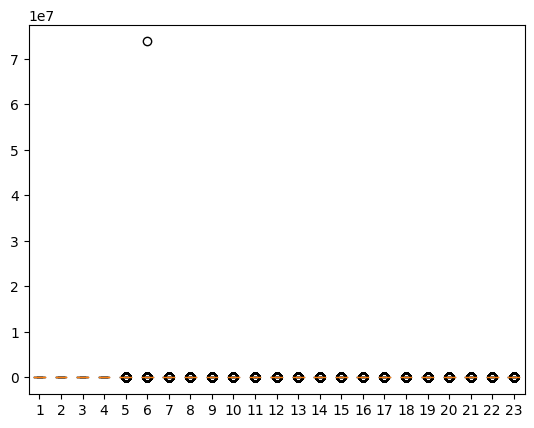

In [16]:
plt.boxplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


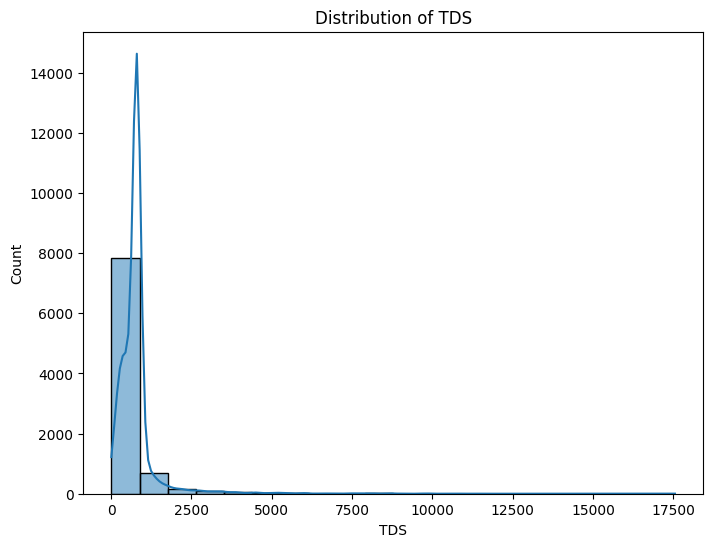

In [17]:
# Step 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of pH
plt.figure(figsize=(8, 6))
sns.histplot(df['TDS'], bins=20, kde=True)
plt.title('Distribution of TDS')
plt.show()

/tmp/ipykernel_27/435319664.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[col] == i]['pH'], kde=False, hist = True, color="red")


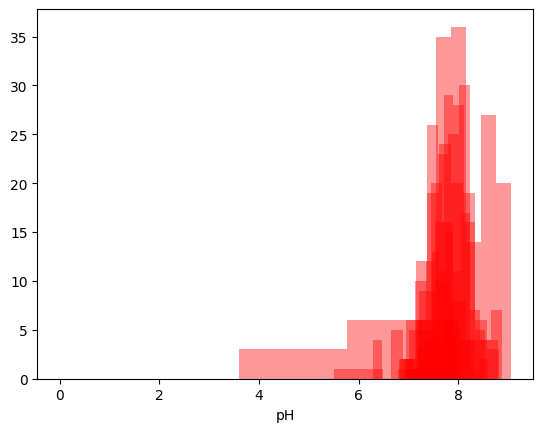

In [18]:
i = 0
for col in df.columns:
    sns.distplot(df[df[col] == i]['pH'], kde=False, hist = True, color="red")
    i = i+1
plt.show()

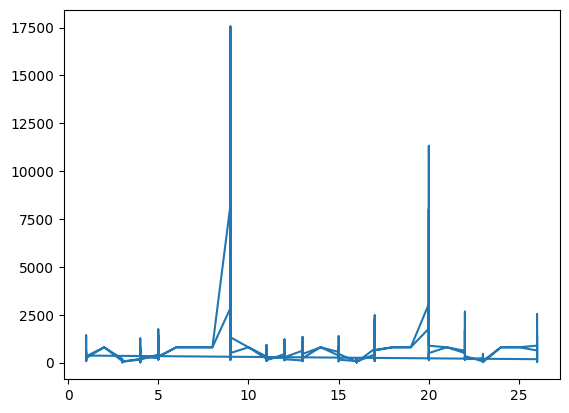

In [19]:
x = df['STATE']
y = df['TDS']
plt.plot(x,y)
plt.show()

# **Unsupervised Algorithms**

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
scaled_data_no_nan = imputer.fit_transform(scaled_data)

# Split the data into training and testing sets
X_train, X_test = train_test_split(scaled_data_no_nan, test_size=0.2, random_state=42)

# Build the autoencoder model
input_dim = X_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, X_train, epochs=30, batch_size=32, validation_data=(X_test, X_test))

# Use the trained model for encoding the data
encoded_data = model.predict(scaled_data_no_nan)

# Perform clustering on the encoded data (example: KMeans)
kmeans = KMeans(n_clusters=2)  # You can choose the number of clusters based on your requirements
clusters = kmeans.fit_predict(encoded_data)

# Assess the clustering performance (example: Silhouette Score)
silhouette_avg = silhouette_score(encoded_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Epoch 1/30
223/223 [==============================] - 3s 4ms/step - loss: 0.4769 - val_loss: 0.4141
Epoch 2/30
223/223 [==============================] - 1s 3ms/step - loss: 0.1666 - val_loss: 0.3391
Epoch 3/30
223/223 [==============================] - 1s 3ms/step - loss: 0.1022 - val_loss: 0.3207
Epoch 4/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0706 - val_loss: 0.3065
Epoch 5/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0474 - val_loss: 0.3234
Epoch 6/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0338 - val_loss: 0.3372
Epoch 7/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0384 - val_loss: 0.2689
Epoch 8/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0407 - val_loss: 0.3101
Epoch 9/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0226 - val_loss: 0.3115
Epoch 10/30
223/223 [==============================] - 1s 3ms/step - loss: 0.0190 - val_loss: 0.3270

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6157320737838745


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


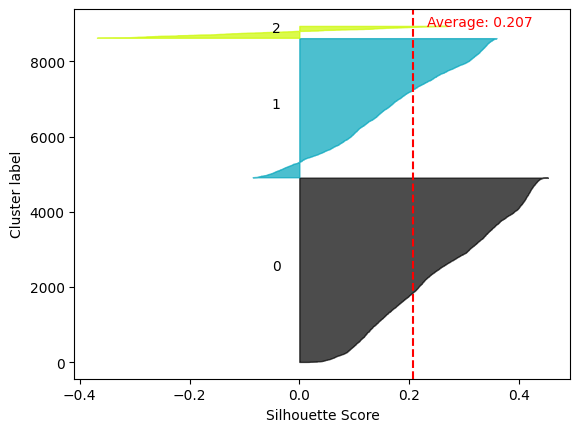

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Perform clustering on the encoded data (example: KMeans)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(encoded_data)

# Calculate Silhouette Scores for each data point
silhouette_values = silhouette_samples(encoded_data, clusters)

# Plotting the silhouette plot
fig, ax = plt.subplots()
y_lower = 10  # Starting y-coordinate for the silhouette plot

for i in range(len(np.unique(clusters))):
    # Aggregate the silhouette scores for samples belonging to cluster i
    cluster_i_values = silhouette_values[clusters == i]
    cluster_i_values.sort()

    # Compute y_upper for the silhouette plot
    y_upper = y_lower + len(cluster_i_values)

    # Color the clusters for better visualization
    color = plt.cm.nipy_spectral(float(i) / len(np.unique(clusters)))

    # Fill the silhouette plot
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plot with cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * len(cluster_i_values), str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_xlabel("Silhouette Score")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score across all clusters
silhouette_avg = silhouette_score(encoded_data, clusters)
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Annotate the average silhouette score
ax.text(silhouette_avg + 0.025, y_lower - 15, f'Average: {silhouette_avg:.3f}', color="red")

plt.show()


# **Supervise Learning**

In [22]:
df.columns

Index(['STATE', 'DISTRICT', 'BLOCK', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'pH',
       'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'PO4', 'TH', 'Ca', 'Mg', 'Na',
       'K', 'F', 'SiO2', 'TDS', 'U(ppb)'],
      dtype='object')

In [23]:
df_supervised = df.drop(['STATE', 'DISTRICT', 'BLOCK', 'U(ppb)'],axis=1)

In [24]:
df_supervised.head(5)

,LOCATION,LATITUDE,LONGITUDE,pH,EC,CO3,HCO3,Cl,SO4,NO3,PO4,TH,Ca,Mg,Na,K,F,SiO2,TDS
0,1.0,11.54500,92.74583,7.74,349.0,0.0,183.0,25.0,1.0,1.0,0.067829,175.0,34.0,22.0,10.0,0.0,0.84,25.12151,206.0
1,2.0,11.60250,92.73000,7.53,660.0,0.0,262.0,82.0,5.0,1.0,0.067829,250.0,52.0,29.0,51.0,1.0,0.28,25.12151,381.0
2,3.0,11.62083,92.73028,7.50,270.0,0.0,116.0,35.0,1.0,0.0,0.067829,125.0,4.0,28.0,10.0,1.0,0.46,25.12151,151.0
3,4.0,11.73250,92.70861,7.60,311.0,0.0,159.0,39.0,2.0,0.0,0.067829,135.0,26.0,17.0,15.0,2.0,0.37,25.12151,198.0
4,5.0,11.66361,92.65806,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,0.067829,465.0,56.0,79.0,336.0,18.0,0.95,25.12151,1424.0


In [25]:
df_x = df_supervised.drop(['TDS'],axis = 1)
df_y = df['TDS']

In [26]:
df_x.dtypes

LOCATION     float64
LATITUDE     float64
LONGITUDE    float64
pH           float64
EC           float64
CO3          float64
HCO3         float64
Cl           float64
SO4          float64
NO3          float64
PO4          float64
TH           float64
Ca           float64
Mg           float64
Na           float64
K            float64
F            float64
SiO2         float64
dtype: object

In [27]:
df_y

0        206.0
1        381.0
2        151.0
3        198.0
4       1424.0
         ...  
9054     521.0
9055     460.0
9056     496.0
9057     378.0
9058     572.0
Name: TDS, Length: 8916, dtype: float64

In [28]:
import pandas as pd

def convert_to_classes_and_replace(data_series):
    classes = []
    for value in data_series:
        value_numeric = pd.to_numeric(value, errors='coerce')
        if pd.isnull(value_numeric):
            classes.append("Invalid value")
        elif value_numeric < 300:
            classes.append("Excellent range for drinking water")
        elif 300 <= value_numeric <= 500:
            classes.append("Good range")
        elif 600 <= value_numeric <= 900:
            classes.append("Fair range")
        elif 900 <= value_numeric <= 1200:
            classes.append("Poor range")
        else:
            classes.append("Unacceptable range")
    return classes

# Example usage:
data_series = df_y
replaced_data = convert_to_classes_and_replace(data_series)

df_y = replaced_data

In [29]:
from sklearn.preprocessing import LabelEncoder

# Sample dataset with string classes
data = df_y
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data to numerical labels
numerical_labels = label_encoder.fit_transform(data)

# print("Original data:", data)
# print("Numerical labels:", numerical_labels)


In [30]:
df_y = numerical_labels
df_y

array([0, 2, 0, ..., 2, 2, 4])

In [31]:
df_y = df_y.astype(np.float64)
df_y.dtype

dtype('float64')

In [32]:
df_x = df_x.drop(["LOCATION"], axis = 1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_x
y = df_y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9590807174887892


In [34]:
inp = [11.545,92.74583,7.74,349,0,183,25,1,1,0,175,34,22,10,0,0.84,0]
rf_classifier.predict([inp])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [35]:
df_y

array([0., 2., 0., ..., 2., 2., 4.])

In [36]:
import pickle 
with open("rf_model.pkl", "wb") as f:  # Replace "rf_model.pkl" with your desired filename
    pickle.dump(rf_classifier, f)
